In [1]:
import os
import zipfile

zip_file_path = 'C:/VIN_PYCHARM/ONE/Data/cats_and_dogs_filtered.zip'
unzip_path = 'C:/VIN_PYCHARM/ONE/Data/temp'

zipref = zipfile.ZipFile(zip_file_path, 'r')
zipref.extractall(unzip_path)
zipref.close()

base_folder = os.path.join(unzip_path, 'cats_and_dogs_filtered')
train_folder = os.path.join(base_folder, 'train')
validation_folder = os.path.join(base_folder, 'validation')

train_folder_cat = os.path.join(train_folder, 'cats')
validation_folder_cat = os.path.join(validation_folder, 'cats')
train_folder_dog = os.path.join(train_folder,'dogs')
validation_folder_dog = os.path.join(validation_folder, 'dogs')

In [2]:
import tensorflow as tf
from tensorflow import keras

THRESHOLD_ACCURACY = 0.9999

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs['accuracy']) > THRESHOLD_ACCURACY:
            print(("\nAchieved desire accuracy, Stops training"))
            self.model.stop_training = true

In [3]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Conv2D(128,(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))

model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))


In [4]:
from tensorflow.keras.optimizers import RMSprop


model.compile(optimizer=RMSprop(lr=1e-4), loss = 'binary_crossentropy', metrics=['accuracy'])

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagenerator = ImageDataGenerator(rescale=1.0/255,
                                         rotation_range=40,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         horizontal_flip=True,
                                         fill_mode='nearest'
                                         )
validation_datagenerator = ImageDataGenerator(rescale=1.0/255,
                                              rotation_range=40,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True,
                                              fill_mode='nearest')

train_generator = train_datagenerator.flow_from_directory(train_folder,
                                                          target_size=(150,150),
                                                          class_mode='binary',
                                                          batch_size=10)

validation_generator = validation_datagenerator.flow_from_directory(validation_folder,
                                                                    target_size=(150,150),
                                                                    class_mode='binary',
                                                                    batch_size=10)
callbacks = myCallback()

history = model.fit(train_generator,
                    validation_data= validation_generator,
                    steps_per_epoch = 100,
                    epochs=15,
                    validation_steps=50,
                    verbose=2,
                    callbacks = [callbacks])

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/15
100/100 - 35s - loss: 0.6973 - accuracy: 0.5230 - val_loss: 0.6895 - val_accuracy: 0.5980
Epoch 2/15
100/100 - 35s - loss: 0.6944 - accuracy: 0.5050 - val_loss: 0.6834 - val_accuracy: 0.5580
Epoch 3/15
100/100 - 35s - loss: 0.6910 - accuracy: 0.5260 - val_loss: 0.6739 - val_accuracy: 0.6240
Epoch 4/15
100/100 - 35s - loss: 0.6761 - accuracy: 0.5710 - val_loss: 0.6637 - val_accuracy: 0.5740
Epoch 5/15
100/100 - 35s - loss: 0.6703 - accuracy: 0.5910 - val_loss: 0.6937 - val_accuracy: 0.5380
Epoch 6/15
100/100 - 35s - loss: 0.6689 - accuracy: 0.5790 - val_loss: 0.6567 - val_accuracy: 0.6000
Epoch 7/15
100/100 - 35s - loss: 0.6621 - accuracy: 0.5950 - val_loss: 0.6753 - val_accuracy: 0.6020
Epoch 8/15
100/100 - 35s - loss: 0.6457 - accuracy: 0.6190 - val_loss: 0.6337 - val_accuracy: 0.6140
Epoch 9/15
100/100 - 35s - loss: 0.6440 - accuracy: 0.6010 - val_loss: 0.6289 - val_accuracy: 0.6480
Epoch 1

Text(0.5, 1.0, 'training and validating loss')

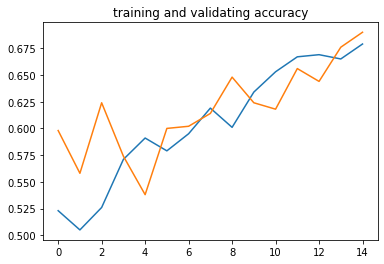

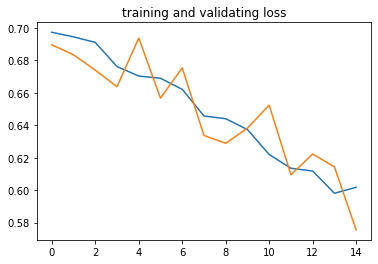

In [6]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('training and validating accuracy')
plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('training and validating loss')